In [1]:
import mne 
import os
import mne 
from mne.io import  read_raw_edf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from source import data_import
import pyarrow as pa


In [2]:
# to load it with memory mapping
p_df_mem = data_import.load_pyarrow(file_name="my_data")
#p_df_mem = data_import.load_pyarrow(file_name="preprocessed_df_new_eda")
p_df_mem.shape

/Users/anabroggini/Documents/bootcamp/ai2/source/data_import.py:389: UserWarning: FileNotFoundError: [Errno 2] Failed to open local file '/Users/anabroggini/Documents/bootcamp/ai2/source/../data/my_data.arrow'. Detail: [errno 2] No such file or directory
  warnings.warn(f"FileNotFoundError: {e}")


AttributeError: 'NoneType' object has no attribute 'shape'

In [5]:
p_df_mem.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 42030080 entries, 0 days 00:00:00 to 1 days 21:36:19.996093750
Freq: 3906250N
Data columns (total 26 columns):
 #   Column          Dtype  
---  ------          -----  
 0   FP1-F7          float64
 1   F7-T7           float64
 2   T7-P7           float64
 3   P7-O1           float64
 4   FP1-F3          float64
 5   F3-C3           float64
 6   C3-P3           float64
 7   P3-O1           float64
 8   FP2-F4          float64
 9   F4-C4           float64
 10  C4-P4           float64
 11  P4-O2           float64
 12  FP2-F8          float64
 13  F8-T8           float64
 14  T8-P8-0         float64
 15  P8-O2           float64
 16  FZ-CZ           float64
 17  CZ-PZ           float64
 18  P7-T7           float64
 19  T7-FT9          float64
 20  FT9-FT10        float64
 21  FT10-T8         float64
 22  T8-P8-1         float64
 23  is_seizure      bool   
 24  before_seizure  bool   
 25  ECG             float64
dtypes: bool(2), float6

In [6]:
#Variance
grouped_var = p_df_mem.groupby(['is_seizure']).var().reset_index()
grouped_var = grouped_var.drop(['before_seizure', 'ECG'], axis =1)
melted_data_var = pd.melt(grouped_var, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Var')

melted_data_var.sort_values(by = 'Var', ascending=False)

#STD
grouped_std = p_df_mem.groupby(['is_seizure']).std().reset_index()
grouped_std = grouped_std.drop(['before_seizure', 'ECG'], axis =1)
melted_data_std = pd.melt(grouped_std, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Std')

melted_data_std.sort_values(by = 'Std', ascending=False)

#MIN
grouped_min = p_df_mem.groupby(['is_seizure']).min().reset_index()
grouped_min = grouped_min.drop(['before_seizure', 'ECG'], axis =1)
melted_data_min = pd.melt(grouped_min, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Min')

melted_data_min.sort_values(by = 'Min', ascending=False)
#MAX
grouped_max = p_df_mem.groupby(['is_seizure']).max().reset_index()
grouped_max = grouped_max.drop(['before_seizure', 'ECG'], axis =1)
melted_data_max = pd.melt(grouped_max, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Max')

melted_data_max.sort_values(by = 'Max', ascending=False) 

,is_seizure,Channel,Max
30,False,P8-O2,2992.722833
10,False,F3-C3,2786.813187
22,False,P4-O2,2665.299145
42,False,FT10-T8,2601.611722
40,False,FT9-FT10,2575.824176
2,False,F7-T7,2555.897436
0,False,FP1-F7,2533.235653
18,False,F4-C4,2517.997558
26,False,F8-T8,2481.660562
12,False,C3-P3,2457.826618


<Figure size 1200x600 with 0 Axes>

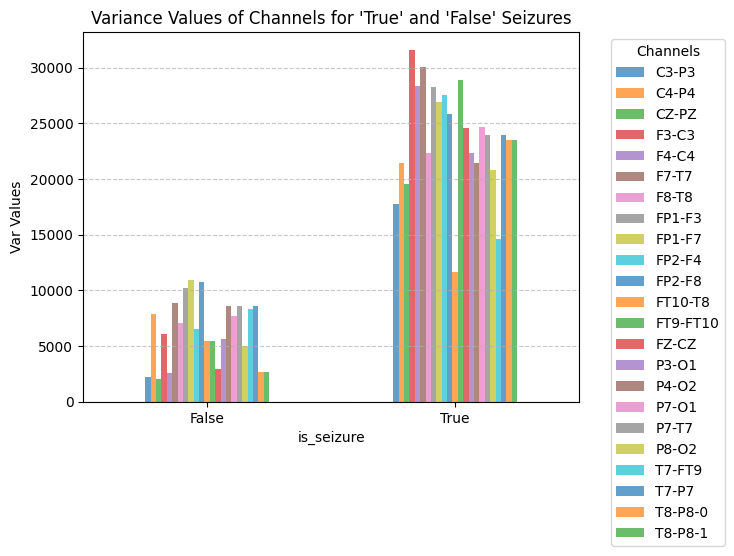

In [7]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_var.pivot(index='is_seizure', columns='Channel', values='Var')

# Create a bar plot for Variance
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("Var Values")
plt.title("Variance Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [8]:
grouped_var.head()

channel,is_seizure,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,False,10896.116129,8909.373698,8591.549000,7666.630311,10176.978427,6044.673022,2184.856281,5600.796358,6493.647856,...,7029.629991,2685.680406,4965.953830,2954.719418,2068.568979,8591.549000,8298.249862,5480.356361,5468.008844,2685.680406
1,True,26948.321792,30057.078289,23944.749119,24688.649110,28227.211657,31589.354518,17740.364642,22334.429946,27565.725520,...,22340.295108,23465.703238,20803.458317,24585.839849,19573.453828,23944.749119,14637.113780,28919.695959,11694.513329,23465.703238


In [9]:
diff_df = grouped_var.iloc[0, 1:] - grouped_var.iloc[1, 1:]

# Create a new DataFrame with the differences
result_df_var = pd.DataFrame({'Channel': grouped_var.columns[1:], 'Variance_Difference': diff_df.values})

# Print or use the 'result_df' DataFrame
print(result_df_var)

     Channel Variance_Difference
0     FP1-F7       -16052.205662
1      F7-T7       -21147.704591
2      T7-P7       -15353.200119
3      P7-O1       -17022.018799
4     FP1-F3        -18050.23323
5      F3-C3       -25544.681496
6      C3-P3       -15555.508361
7      P3-O1       -16733.633588
8     FP2-F4       -21072.077664
9      F4-C4       -25771.840395
10     C4-P4       -13586.736856
11     P4-O2       -12889.969001
12    FP2-F8       -15057.042778
13     F8-T8       -15310.665117
14   T8-P8-0       -20780.022831
15     P8-O2       -15837.504487
16     FZ-CZ        -21631.12043
17     CZ-PZ       -17504.884849
18     P7-T7       -15353.200119
19    T7-FT9        -6338.863918
20  FT9-FT10       -23439.339598
21   FT10-T8        -6226.504485
22   T8-P8-1       -20780.022831


In [10]:
#Best ten channels to select for the model 
sorted_result_df_var = result_df_var.sort_values(by='Variance_Difference', ascending=True)
biggest_ten_values = sorted_result_df_var.head(10)

In [11]:

print(biggest_ten_values)

     Channel Variance_Difference
9      F4-C4       -25771.840395
5      F3-C3       -25544.681496
20  FT9-FT10       -23439.339598
16     FZ-CZ        -21631.12043
1      F7-T7       -21147.704591
8     FP2-F4       -21072.077664
22   T8-P8-1       -20780.022831
14   T8-P8-0       -20780.022831
4     FP1-F3        -18050.23323
17     CZ-PZ       -17504.884849


In [12]:
top_ten_channels = biggest_ten_values['Channel'].head(10).tolist()

In [13]:
print(top_ten_channels)

['F4-C4', 'F3-C3', 'FT9-FT10', 'FZ-CZ', 'F7-T7', 'FP2-F4', 'T8-P8-1', 'T8-P8-0', 'FP1-F3', 'CZ-PZ']


In [14]:
#Variance
grouped_var_ten = p_df_mem.groupby(['is_seizure']).var().reset_index()
grouped_var_ten = grouped_var_ten.drop(['before_seizure', 'ECG'], axis =1)
melted_data_var = pd.melt(grouped_var, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Var')

melted_data_var.sort_values(by = 'Var', ascending=False)


,is_seizure,Channel,Var
11,True,F3-C3,31589.354518
3,True,F7-T7,30057.078289
41,True,FT9-FT10,28919.695959
19,True,F4-C4,28348.750386
9,True,FP1-F3,28227.211657
17,True,FP2-F4,27565.725520
1,True,FP1-F7,26948.321792
25,True,FP2-F8,25818.070627
7,True,P7-O1,24688.649110
33,True,FZ-CZ,24585.839849


In [15]:

#STD
grouped_std = p_df_mem.groupby(['is_seizure']).std().reset_index()
grouped_std = grouped_std.drop(['before_seizure', 'ECG'], axis =1)
melted_data_std = pd.melt(grouped_std, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Std')

melted_data_std.sort_values(by = 'Std', ascending=False)

#MIN
grouped_min = p_df_mem.groupby(['is_seizure']).min().reset_index()
grouped_min = grouped_min.drop(['before_seizure', 'ECG'], axis =1)
melted_data_min = pd.melt(grouped_min, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Min')

melted_data_min.sort_values(by = 'Min', ascending=False)
#MAX
grouped_max = p_df_mem.groupby(['is_seizure']).max().reset_index()
grouped_max = grouped_max.drop(['before_seizure', 'ECG'], axis =1)
melted_data_max = pd.melt(grouped_max, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Max')

melted_data_max.sort_values(by = 'Max', ascending=False)

,is_seizure,Channel,Max
30,False,P8-O2,2992.722833
10,False,F3-C3,2786.813187
22,False,P4-O2,2665.299145
42,False,FT10-T8,2601.611722
40,False,FT9-FT10,2575.824176
2,False,F7-T7,2555.897436
0,False,FP1-F7,2533.235653
18,False,F4-C4,2517.997558
26,False,F8-T8,2481.660562
12,False,C3-P3,2457.826618


In [16]:
grouped_std

channel,is_seizure,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,False,104.384463,94.389479,92.690609,87.559296,100.881011,77.747495,46.742446,74.838468,80.583174,...,83.842889,51.823551,70.469524,54.357331,45.481523,92.690609,91.09473,74.029429,73.945986,51.823551
1,True,164.159440,173.369773,154.740910,157.126220,168.009558,177.733943,133.192960,149.447081,166.029291,...,149.466702,153.185193,144.234040,156.798724,139.905160,154.740910,120.98394,170.057919,108.141173,153.185193


<Figure size 1200x600 with 0 Axes>

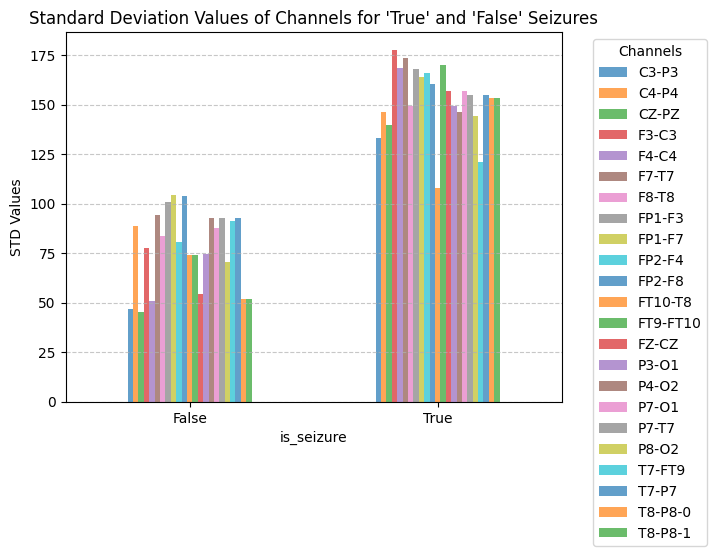

In [17]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_std.pivot(index='is_seizure', columns='Channel', values='Std')

# Create a bar plot for Standard Deviation 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("STD Values")
plt.title("Standard Deviation Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
# Create a new DataFrame with only the top ten channels
grouped_var_ten = grouped_var[['is_seizure'] + top_ten_channels]

# Create a new DataFrame with only the top ten channels
grouped_std_ten = grouped_std[['is_seizure'] + top_ten_channels]
# Create a new DataFrame with only the top ten channels
grouped_min_ten = grouped_min[['is_seizure'] + top_ten_channels]
# Create a new DataFrame with only the top ten channels
grouped_max_ten = grouped_max[['is_seizure'] + top_ten_channels]


In [20]:
#Variance
melted_data_var_ten = pd.melt(grouped_var_ten, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Var')
melted_data_var_ten.sort_values(by = 'Var', ascending=False)

#STD
melted_data_std = pd.melt(grouped_std_ten, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Std')

melted_data_std.sort_values(by = 'Std', ascending=False)

#MIN
melted_data_min = pd.melt(grouped_min_ten, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Min')

melted_data_min.sort_values(by = 'Min', ascending=False)

#MAX

melted_data_max = pd.melt(grouped_max_ten, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Max')

melted_data_max.sort_values(by = 'Max', ascending=False)


,is_seizure,Channel,Max
2,False,F3-C3,2786.813187
4,False,FT9-FT10,2575.824176
8,False,F7-T7,2555.897436
0,False,F4-C4,2517.997558
16,False,FP1-F3,2355.067155
11,True,FP2-F4,2088.205128
10,False,FP2-F4,2062.808303
12,False,T8-P8-1,2035.457875
14,False,T8-P8-0,2035.457875
19,True,CZ-PZ,1960.439560


Channel            CZ-PZ         F3-C3         F4-C4         F7-T7  \
is_seizure                                                           
False        2068.568979   6044.673022   2576.909991   8909.373698   
True        19573.453828  31589.354518  28348.750386  30057.078289   

Channel           FP1-F3        FP2-F4      FT9-FT10         FZ-CZ  \
is_seizure                                                           
False       10176.978427   6493.647856   5480.356361   2954.719418   
True        28227.211657  27565.725520  28919.695959  24585.839849   

Channel          T8-P8-0       T8-P8-1  
is_seizure                              
False        2685.680406   2685.680406  
True        23465.703238  23465.703238  


<Figure size 1200x600 with 0 Axes>

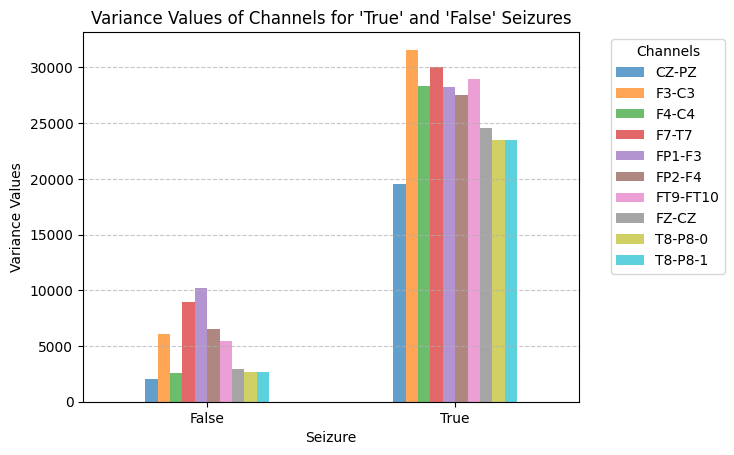

In [21]:
# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_var_ten.pivot(index='is_seizure', columns='Channel', values='Var')

print(pivoted_df)
# Create a bar plot for Standard Deviation 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("Seizure")
plt.ylabel("Variance Values")
plt.title("Variance Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

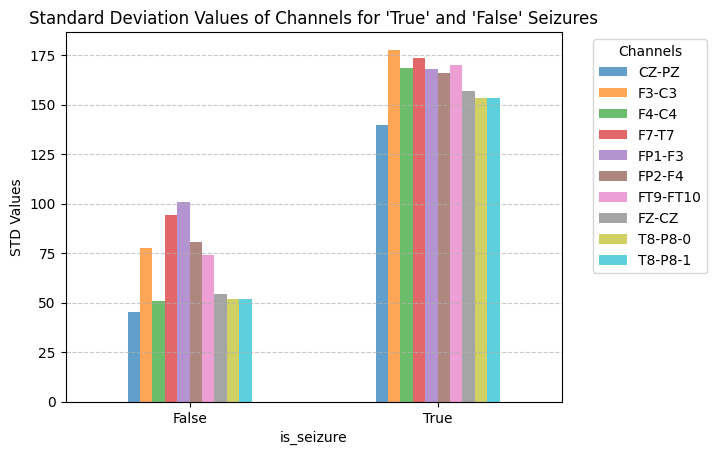

In [22]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_std.pivot(index='is_seizure', columns='Channel', values='Std')

# Create a bar plot for Standard Deviation 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("STD Values")
plt.title("Standard Deviation Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

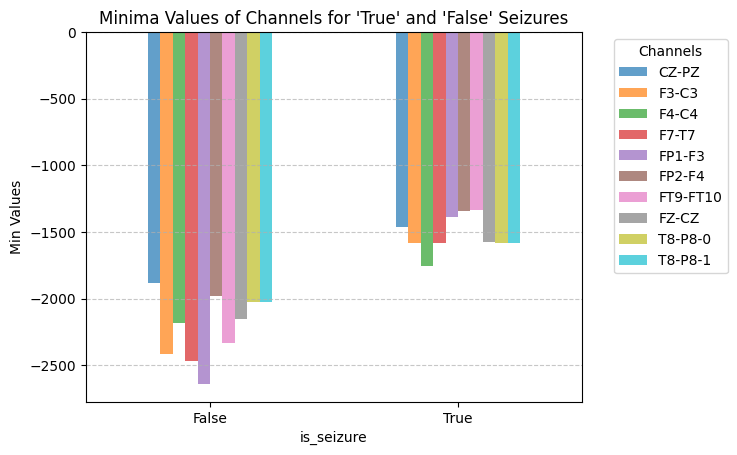

In [ ]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_min.pivot(index='is_seizure', columns='Channel', values='Min')

# Create a bar plot for Standard Deviation 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("Min Values")
plt.title("Minima Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

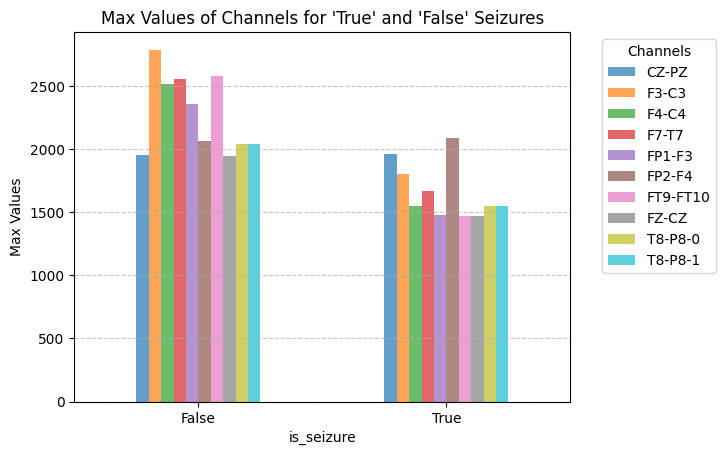

In [ ]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_max.pivot(index='is_seizure', columns='Channel', values='Max')

# Create a bar plot for Standard Deviation 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("Max Values")
plt.title("Max Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

mean number of seizures: 4.29


/home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

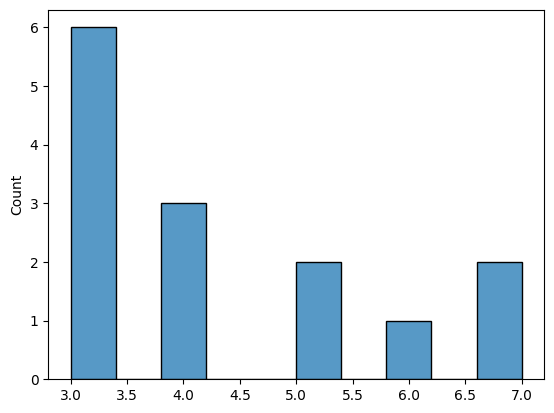

In [18]:
from source.data_import import get_seizures_per_patient
from source.constants import DEFAULT_PATIENTS
import seaborn as sns
import math

nr_seizures = get_seizures_per_patient(patient_ids=DEFAULT_PATIENTS)
len(nr_seizures)
print(f"mean number of seizures: {sum(nr_seizures)/len(nr_seizures):.2f}")
sns.histplot(nr_seizures, bins=10)


/home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

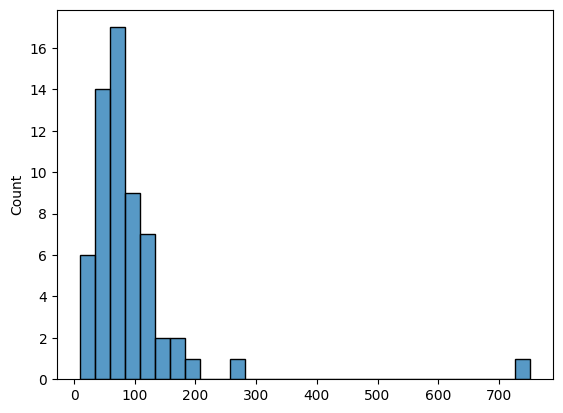

In [3]:
from source.data_import import get_seizure_lengths
from source.constants import DEFAULT_PATIENTS
import seaborn as sns

seizure_lengths = get_seizure_lengths(patient_ids=DEFAULT_PATIENTS)
sns.histplot(seizure_lengths)